<a href="https://colab.research.google.com/github/SamAniedi/linear_discriminant_analysis_and_LR/blob/main/Logistic_Regression_Linear_Discriminant_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data importation and Preprocessing


In [ ]:
pwd

'/content'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Maching Learning csv files/Classification models/House-Price.csv", header = 0)

In [ ]:
df.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

In [ ]:
# to get the rows and columns
df.shape

(506, 19)

In [ ]:
# to get the EDD
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


### OUTLIERS (USING BOXPLOT)


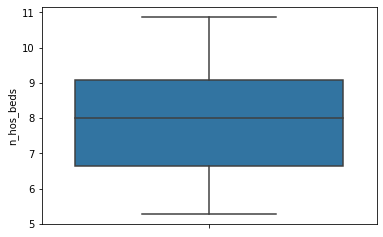

In [ ]:
# to find outlier use box plot
sns.boxplot(y = 'n_hos_beds', data = df)


##### The line on 9 is the 75 percentile, while the middle is the 50% or median, and the bottom line is the 25%.

##### The difference between the upper line of the box 75% and the 25% is known as the inter quartile range(IQR).

##### Whatever line lies outside of this are known as outliers


In [ ]:
# to know more
?sns.boxplot()

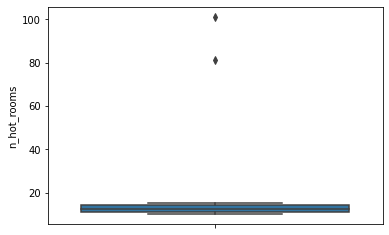

In [ ]:
# box plot for n_hot_rooms
sns.boxplot(y = 'n_hot_rooms', data = df)

##### The two points outside are known as outliers, it means that these outliers are the only values that are lying above 20

### OUTLIERS(SCATTERPLOT)

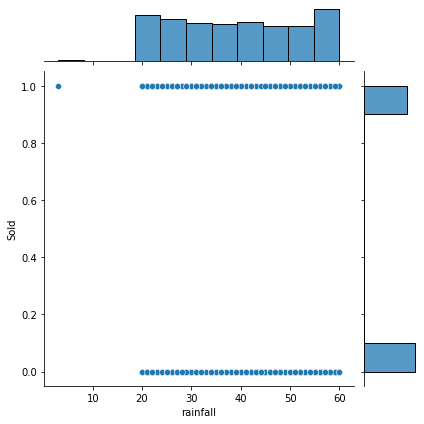

In [ ]:
sns.jointplot(x = "rainfall", y = "Sold", data = df)

##### There is an outlier on the lower end of rainfall, close to 0

#### Observations:
##### There are outliers in the higher end of n_hot_rooms, there are outliers in the lower end of rainfall, and there are missing values in n_hos_beds

#### Categorical variables
###### for the categorical variables, we will plot bar graph

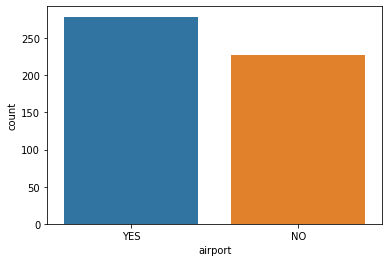

In [ ]:
sns.countplot(x = "airport", data = df)

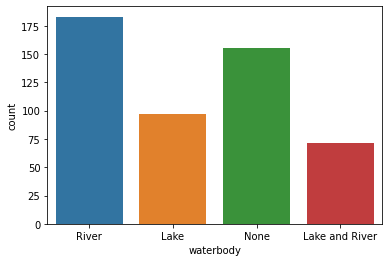

In [ ]:
sns.countplot(x = "waterbody", data = df)

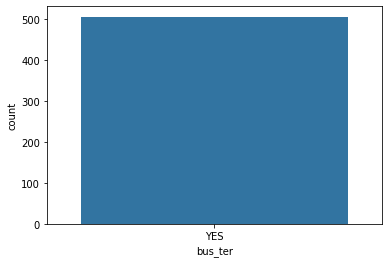

In [ ]:
sns.countplot(x = "bus_ter", data = df)

###### Bus terminal has only one variable, so it is useless to our model, we can delete it if we want

## OUTLIER TREATMENT IN PYTHON

In [ ]:
# We will use capping and flooring, which is 99 percentile and 1 percentile
# to find out the percentile
np.percentile(df.n_hot_rooms, [99])

array([15.39952])

In [ ]:
# we have to specify the location of the value
np.percentile(df.n_hot_rooms, [99])[0]
# the first value


15.39952

In [ ]:
# Saving in another variable
uv = np.percentile(df.n_hot_rooms, [99])[0]

In [ ]:
# to identify the row that n_hot_room is more than this number
df[(df.n_hot_rooms > uv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
2,34.7,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105,0
204,50.0,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178,0
267,50.0,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235,0
369,50.0,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477,0
423,13.4,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344,0


In [ ]:
# to limit this value, we can replace those values
# we wont make any changes to the values that are 15.4
df.n_hot_rooms[(df.n_hot_rooms > 3 * uv)] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# similarly in rainfall, there are outliers in the lower parts
np.percentile(df.rainfall, [1])[0]

20.0

In [ ]:
lv = np.percentile(df.rainfall, [1])[0]

In [ ]:
# next try to identify the values that are lower than lv value
df[(df.rainfall < lv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
213,28.1,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019,1


In [ ]:
# Treating the outlier
df[(df.rainfall < 0.3 * lv)] = lv * 0.3

In [ ]:

# to look at EDD  again
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.485178,41.068419,0.565586,6.283893,68.522925,3.975731,3.632885,3.964269,3.623775,21.514032,12.646383,7.896631,12.684955,39.187747,0.066225,0.464427
std,9.208147,7.035901,0.268358,0.702719,28.240108,2.110450,2.111175,2.121714,2.101869,2.272553,7.145709,1.479058,1.805958,12.497221,0.264524,0.555548
min,5.000000,6.000000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,6.000000,1.730000,5.268000,3.000000,6.000000,0.033292,0.000000
25%,16.850000,35.145000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.922500,6.628000,11.185400,28.000000,0.046487,0.000000
50%,21.200000,39.690000,0.538000,6.205000,77.500000,3.385000,3.010000,3.375000,3.070000,20.900000,11.360000,7.999000,12.400000,39.000000,0.053548,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.400000,5.000000,5.417500,5.005000,22.600000,16.955000,9.088000,14.168200,50.000000,0.061453,1.000000
max,50.000000,57.740000,6.000000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,15.400000,60.000000,6.000000,6.000000


## Missing values imputation

In [ ]:
# to check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

In [ ]:
# to fix missing values we will use fillna function
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [ ]:
df.info

<bound method DataFrame.info of      price  resid_area  air_qual  room_num   age  dist1  dist2  dist3  dist4  \
0     24.0       32.31     0.538     6.575  65.2   4.35   3.81   4.18   4.01   
1     21.6       37.07     0.469     6.421  78.9   4.99   4.70   5.12   5.06   
2     34.7       37.07     0.469     7.185  61.1   5.03   4.86   5.01   4.97   
3     33.4       32.18     0.458     6.998  45.8   6.21   5.93   6.16   5.96   
4     36.2       32.18     0.458     7.147  54.2   6.16   5.86   6.37   5.86   
..     ...         ...       ...       ...   ...    ...    ...    ...    ...   
501   22.4       41.93     0.573     6.593  69.1   2.64   2.45   2.76   2.06   
502   20.6       41.93     0.573     6.120  76.7   2.44   2.11   2.46   2.14   
503   23.9       41.93     0.573     6.976  91.0   2.34   2.06   2.29   1.98   
504   22.0       41.93     0.573     6.794  89.3   2.54   2.31   2.40   2.31   
505   19.0       41.93     0.573     6.030  80.8   2.72   2.24   2.64   2.42   

     te

In [ ]:
# to save this data frame into our original data frame
df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


## Variable transformation and deletion
###### Note: we have 4 variables for distances, and they all convey the same information

In [ ]:
# create an average variable, to convey all of them in the same variable
df['avg_dist'] = (df.dist1 + df.dist2 +df. dist3 + df.dist4)/4

In [ ]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.485178,41.068419,0.565586,6.283893,68.522925,3.975731,3.632885,3.964269,3.623775,21.514032,12.646383,7.896631,12.684955,39.187747,0.066225,0.464427,3.799165
std,9.208147,7.035901,0.268358,0.702719,28.240108,2.110450,2.111175,2.121714,2.101869,2.272553,7.145709,1.467296,1.805958,12.497221,0.264524,0.555548,2.108129
min,5.000000,6.000000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,6.000000,1.730000,5.268000,3.000000,6.000000,0.033292,0.000000,1.127500
25%,16.850000,35.145000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.922500,6.641500,11.185400,28.000000,0.046487,0.000000,2.100625
50%,21.200000,39.690000,0.538000,6.205000,77.500000,3.385000,3.010000,3.375000,3.070000,20.900000,11.360000,7.963000,12.400000,39.000000,0.053548,0.000000,3.207500
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.400000,5.000000,5.417500,5.005000,22.600000,16.955000,9.076000,14.168200,50.000000,0.061453,1.000000,5.213750
max,50.000000,57.740000,6.000000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,15.400000,60.000000,6.000000,6.000000,12.127500


In [ ]:
# to delete a variable'
del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']

In [ ]:
df.describe()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.485178,41.068419,0.565586,6.283893,68.522925,21.514032,12.646383,7.896631,12.684955,39.187747,0.066225,0.464427,3.799165
std,9.208147,7.035901,0.268358,0.702719,28.240108,2.272553,7.145709,1.467296,1.805958,12.497221,0.264524,0.555548,2.108129
min,5.000000,6.000000,0.385000,3.561000,2.900000,6.000000,1.730000,5.268000,3.000000,6.000000,0.033292,0.000000,1.127500
25%,16.850000,35.145000,0.449000,5.885500,45.025000,19.800000,6.922500,6.641500,11.185400,28.000000,0.046487,0.000000,2.100625
50%,21.200000,39.690000,0.538000,6.205000,77.500000,20.900000,11.360000,7.963000,12.400000,39.000000,0.053548,0.000000,3.207500
75%,25.000000,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.168200,50.000000,0.061453,1.000000,5.213750
max,50.000000,57.740000,6.000000,8.780000,100.000000,27.400000,37.970000,10.876000,15.400000,60.000000,6.000000,6.000000,12.127500


In [ ]:
# delete bus_ter it has only one variable
del df['bus_ter']

In [ ]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,avg_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.1920,River,23,0.049347,0,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.1728,Lake,42,0.046146,1,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,3.0000,None,38,0.045764,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.2672,Lake,45,0.047151,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.2896,Lake,55,0.039474,0,6.0625


## Dummy Variable Creation

In [ ]:
# We need to change the categorical values into numerical values
# to create dummy variable
df = pd.get_dummies(df)

In [ ]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,...,Sold,avg_dist,airport_6.0,airport_NO,airport_YES,waterbody_6.0,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,...,0,4.0875,0,0,1,0,0,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,...,1,4.9675,0,1,0,0,1,0,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,3.0000,38,...,0,4.9675,0,1,0,0,0,0,1,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,...,0,6.0650,0,0,1,0,1,0,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,...,0,6.0625,0,1,0,0,1,0,0,0


In [ ]:
# delete airpot_NO because it is a redundant variable, it means the same thing with airport_YES
del df['airport_NO']
del df['waterbody_None']

In [ ]:

df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_6.0,airport_YES,waterbody_6.0,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,0,4.0875,0,1,0,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,1,4.9675,0,0,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,3.0000,38,0.045764,0,4.9675,0,0,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,0,6.0650,0,1,0,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,0,6.0625,0,0,0,1,0,0


# LOGISTIC REGRESSION

### Using sklearn

In [ ]:
# We need to create our Independant and Dependable variable, X and Y
X = df[['price']]

In [ ]:
y = df['Sold']

In [ ]:
# to get the sample of this dataset
X.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Sold, dtype: int64

In [ ]:
# We will create our model using sklearn
from sklearn.linear_model import LogisticRegression

In [ ]:
# Creating our object
clf_lrs = LogisticRegression()

In [ ]:
# fit X and y variable
clf_lrs.fit(X,y)

LogisticRegression()

In [ ]:
# To check the coefficient and intercept of our model B0, B1
clf_lrs.coef_


array([[ 0.28569195],
       [ 0.24958456],
       [-0.53527651]])

In [ ]:

clf_lrs.intercept_

array([-1.34399474, -0.72556088,  2.06955562])

### Multiple Logistic Models

In [ ]:
# to drop the dependent variable
X = df.loc[:, df.columns != 'Sold']

In [ ]:
y = df['Sold']

In [ ]:
# to create the classifier object
clf_lr = LogisticRegression()

In [ ]:
# to fit the model
clf_lr.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# to see the coefficient value
clf_lr.coef_

array([[ 0.14738331,  0.06667755, -0.02205716, -0.48047566,  0.03042464,
        -0.10709149,  0.06876981, -0.13617308,  0.00327463,  0.04760428,
        -0.06865941,  0.12235694, -0.01182594,  0.04919356, -0.01182594,
         0.05968132,  0.00512367, -0.12441628],
       [-0.10917688,  0.04327714, -0.11195286,  0.38704236,  0.02512394,
         0.12052028, -0.15372291,  0.05162209, -0.05394711,  0.0427694 ,
        -0.06811823, -0.22011346, -0.01102246, -0.04592872, -0.01102246,
        -0.05850843, -0.00411015,  0.12753754],
       [-0.03820643, -0.10995469,  0.13401002,  0.09343331, -0.05554857,
        -0.01342879,  0.08495311,  0.08455099,  0.05067248, -0.09037369,
         0.13677764,  0.09775652,  0.02284841, -0.00326484,  0.02284841,
        -0.0011729 , -0.00101352, -0.00312126]])

In [ ]:
# to get the intercept
clf_lr.intercept_

array([-0.01384167, -0.00244201,  0.01628369])

### Predicting and Confusion Matrix

In [ ]:
# to get the predicted value from our model
clf_lr.predict_proba(X)

array([[1.23862726e-01, 8.76135077e-01, 2.19659455e-06],
       [4.03836407e-01, 5.96163481e-01, 1.12058154e-07],
       [5.99481021e-01, 4.00518862e-01, 1.16809145e-07],
       ...,
       [2.83917029e-01, 7.16082945e-01, 2.60756972e-08],
       [2.46069663e-01, 7.53930330e-01, 6.99930950e-09],
       [1.60117184e-01, 8.39882797e-01, 1.89017634e-08]])

#### The first column is the probablity of 0, ie NOT SOLD, and the second column is the probability of 1 i.e is SOLD

In [ ]:
# the predict funtion
y_pred = clf_lr.predict(X)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [ ]:
# using the proba and selecting all the rows but only the second column, comparing it with 0.3
# 0.3 is the boundary condition
y_pred_03 = (clf_lr.predict_proba(X)[:,1] >= 0.3)



In [ ]:
y_pred_03

array([ True,  True,  True,  True, False, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,

##### True means 1 and false means 0

In [ ]:
# to compare the accuracy of the model
from sklearn.metrics import confusion_matrix

In [ ]:
# comparing the accuracy of the model
confusion_matrix(y, y_pred)

array([[195,  81,   0],
       [ 81, 148,   0],
       [  0,   0,   1]])

In [ ]:
# rows are for actual outcomes, there are 0 and 1.
# The columns are for predicted classes, the first column is for 0 and the second column is for 1
# 195 stands for 0 and 0, i.e the actual is not sold and the predicted value is not sold, these are known as true negatives
# 81 is in the 0th row, the actul value of this 81 was, but the predicted value was 1 since it is in the second column, these are known as false positive
# 81 are in the second row, there belong in the second row which is sold, but are under 0 which is not sold, these are false negative
# 148 are for 1 and 1, predicted sold and sold





In [ ]:
confusion_matrix(y, y_pred_03)

array([[121, 155,   0],
       [ 18, 211,   0],
       [  1,   0,   0]])

### Performance Metrics

In [ ]:

from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y, y_pred, average= 'micro')

0.6798418972332015

In [ ]:
recall_score(y, y_pred, average = 'micro')

0.6798418972332015

In [ ]:


from sklearn.metrics import roc_auc_score


# LINEAR DISCRIMINANT ANALYSIS

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# creating the linear discriminant object
clf_lda = LinearDiscriminantAnalysis()

In [ ]:
# fitting X and Y into the object
clf_lda.fit(X,y)

LinearDiscriminantAnalysis()

In [ ]:
# Predicting the value of y from the model
y_pred_lda = clf_lda.predict(X)

In [ ]:
y_pred_lda

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
# creating a confusion matrix
confusion_matrix(y, y_pred_lda)

array([[195,  81,   0],
       [ 79, 150,   0],
       [  0,   0,   1]])

# K NEAREST NEIGHBOURS

In [ ]:
# importing test train
from sklearn.model_selection import train_test_split

In [ ]:
# splitting our train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(404, 18) (102, 18) (404,) (102,)


In [ ]:
# creating the model object
clf_LR = LogisticRegression()

In [ ]:
# to fit the model
clf_LR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# to fit the model on x train data set
y_test_pred = clf_LR.predict(X_test)

In [ ]:
# to see the accuracy and the confusion matrix of the model
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# confusion metrics for y test and y test predict
confusion_matrix(y_test, y_test_pred)

array([[37, 21,  0],
       [14, 29,  0],
       [ 0,  1,  0]])

In [ ]:
# accuracy
accuracy_score(y_test, y_test_pred)

0.6470588235294118

# KNN

In [ ]:
# we need to standardize our independent variable
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

In [ ]:
X_test_s

array([[ 0.05799859, -1.0571988 , -0.26193575, ..., -0.4938648 ,
        -0.39886202, -0.75447384],
       [ 3.0709067 ,  1.0070538 ,  0.04909389, ..., -0.4938648 ,
        -0.39886202, -0.75447384],
       [ 0.10198265,  0.42222853, -0.09823594, ..., -0.4938648 ,
        -0.39886202, -0.75447384],
       ...,
       [-0.370846  , -0.79465254, -0.27466796, ..., -0.4938648 ,
        -0.39886202,  1.32542701],
       [-1.7673399 , -4.84119884,  9.81469717, ..., -0.4938648 ,
        -0.39886202, -0.75447384],
       [-0.24988983, -0.3181797 , -0.15280254, ..., -0.4938648 ,
         2.50713268, -0.75447384]])

##### When we standardize data we convert the mean of all of that values of that variable  to 0 and the Standard Deviation to 1

In [ ]:
# to train KNN on our training dataset
from sklearn.neighbors import KNeighborsClassifier
# Creating the KNN model of object
clf_knn_1 = KNeighborsClassifier(n_neighbors= 1)
# to fit our model
clf_knn_1.fit(X_train_s, y_train)



KNeighborsClassifier(n_neighbors=1)

In [ ]:
# to get the confusion matrix
confusion_matrix(y_test, clf_knn_1.predict(X_test_s))

array([[31, 27,  0],
       [15, 28,  0],
       [ 0,  1,  0]])

In [ ]:
# Accurracy_score
accuracy_score(y_test, clf_knn_1.predict(X_test_s))

0.5784313725490197

In [ ]:
clf_knn_3 = KNeighborsClassifier(n_neighbors= 3)
clf_knn_3.fit(X_train_s, y_train)
accuracy_score(y_test, clf_knn_3.predict(X_test_s))

0.5490196078431373

In [ ]:
# How to create a single model for multiple values of K
from sklearn.model_selection import GridSearchCV


In [ ]:
# Creating a dictionary of this parameter
params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [ ]:
# to create the object
grid_search_cv = GridSearchCV(KNeighborsClassifier(),params)

In [ ]:
# to fit the model
grid_search_cv.fit(X_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
# to find out the best parameter
grid_search_cv.best_params_

{'n_neighbors': 10}

In [ ]:
# to pick up the model which is best
optimized_KNN = grid_search_cv.best_estimator_

In [ ]:
y_test_pred = optimized_KNN.predict(X_test_s)

In [ ]:
# to get the confusion matrix
confusion_matrix(y_test, y_test_pred)

array([[42, 16,  0],
       [20, 23,  0],
       [ 0,  1,  0]])

In [ ]:
accuracy_score(y_test, y_test_pred)

0.6372549019607843